In [ ]:
import numpy as np

In [ ]:
class Tensor:

    def __init__(self, data, prev=()):
        self.data = data
        self.prev = prev

    def __add__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data + other.data, prev=(self, other))
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data * other.data, prev=(self, other))
        return out

    def __radd__(self, other):
        return self + other

    def __rmul__(self, other):
        return self * other

    def relu(self):
        return Tensor(np.maximum(self.data, 0), prev=(self,))

    def __repr__(self):
        #return f"Tensor(data={self.data}, prev={self.prev})"
        return f"Tensor(data={self.data})"




In [ ]:
class Neuron:

    def __init__(self, nin):
        self.w = [Tensor(np.random.uniform(-1,1)) for _ in range(nin)]
        self.b = Tensor(np.random.uniform(-1,1))

    def __call__(self, x):
        act = sum([wi * xi for wi, xi in zip(self.w, x)], self.b)
        out = act.relu()
        return out


In [ ]:
def traverse_tensor(tensor, depth=0):
    # Print the current tensor's data with indentation based on the recursion depth
    print("  " * depth + f"Tensor(data={tensor.data:.2f})")
    # Recursively traverse the previous tensors
    for prev_tensor in tensor.prev:
        traverse_tensor(prev_tensor, depth + 1)

In [ ]:
from graphviz import Digraph

# Function to add nodes and edges to the Graphviz graph from the tensor structure
def add_nodes_edges_graphviz(graph, tensor, parent_id=None, current_id=0):
    node_id = str(current_id)
    graph.node(node_id, label=f"{tensor.data:.2f}")
    if parent_id is not None:
        graph.edge(parent_id, node_id)
    next_id = current_id + 1
    for prev_tensor in tensor.prev:
        graph, next_id = add_nodes_edges_graphviz(graph, prev_tensor, node_id, next_id)
    return graph, next_id

# Function to plot the tensor tree and display it
def plot_tensor_tree(tensor):
    dot = Digraph()
    dot, _ = add_nodes_edges_graphviz(dot, tensor)
    return dot

In [ ]:
np.random.seed(123)
Neuron(3)

In [ ]:
x = [2.3, 3.4, 4.5]

n = Neuron(3)
n(x)

Tensor(data=5.18321845249119, prev=(Tensor(data=5.18321845249119, prev=(Tensor(data=0.8563406670296513, prev=(Tensor(data=1.3792167381833167, prev=(Tensor(data=0.3696594771697266, prev=()), Tensor(data=1.0095572610135901, prev=(Tensor(data=0.43893793957112615, prev=()), Tensor(data=2.3, prev=()))))), Tensor(data=-0.5228760711536654, prev=(Tensor(data=-0.15378707975107808, prev=()), Tensor(data=3.4, prev=()))))), Tensor(data=4.326877785461539, prev=(Tensor(data=0.961528396769231, prev=()), Tensor(data=4.5, prev=()))))),))

In [ ]:
traverse_tensor(n(x))

Tensor(data=5.18)
  Tensor(data=5.18)
    Tensor(data=0.86)
      Tensor(data=1.38)
        Tensor(data=0.37)
        Tensor(data=1.01)
          Tensor(data=0.44)
          Tensor(data=2.30)
      Tensor(data=-0.52)
        Tensor(data=-0.15)
        Tensor(data=3.40)
    Tensor(data=4.33)
      Tensor(data=0.96)
      Tensor(data=4.50)


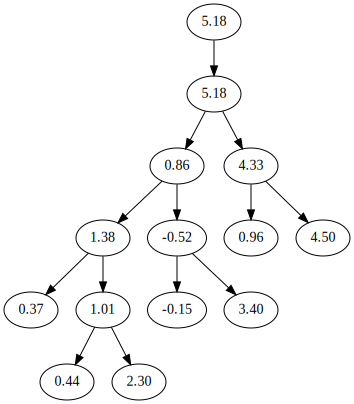

In [ ]:
plot_tensor_tree(n(x))

# Neural Networks

In [ ]:
class Layer:

    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        out = [n(x) for n in self.neurons]
        # return out
        return out[0] if len(out) == 1 else out

In [ ]:
L1 = Layer(3, 4)

In [ ]:
L1

In [ ]:
L1(x)

[Tensor(data=0.0),
 Tensor(data=0.0),
 Tensor(data=0.0),
 Tensor(data=6.337375836829024)]

In [ ]:
L2 = Layer(4, 2)
L2(L1(x))

[Tensor(data=0.0), Tensor(data=0.47275809947563036)]

In [ ]:
L3 = Layer(2, 1)
L3(L2(L1(x)))

[Tensor(data=0.5146807700797873)]

In [ ]:
MLP(3, [4, 2, 1])

In [ ]:
class MLP:

    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [ ]:
n = MLP(3,[4,2,1])

In [ ]:
n(x)

Tensor(data=0.25147559227182337)

In [ ]:
traverse_tensor(n(x))

Tensor(data=0.25)
  Tensor(data=0.25)
    Tensor(data=-0.35)
      Tensor(data=0.50)
      Tensor(data=-0.85)
        Tensor(data=-0.33)
        Tensor(data=2.61)
          Tensor(data=2.61)
            Tensor(data=2.61)
              Tensor(data=2.29)
                Tensor(data=0.12)
                  Tensor(data=-0.12)
                  Tensor(data=0.24)
                    Tensor(data=0.33)
                    Tensor(data=0.73)
                      Tensor(data=0.73)
                        Tensor(data=-3.11)
                          Tensor(data=-1.73)
                            Tensor(data=0.14)
                            Tensor(data=-1.87)
                              Tensor(data=-0.81)
                              Tensor(data=2.30)
                          Tensor(data=-1.38)
                            Tensor(data=-0.41)
                            Tensor(data=3.40)
                        Tensor(data=3.85)
                          Tensor(data=0.86)
                      

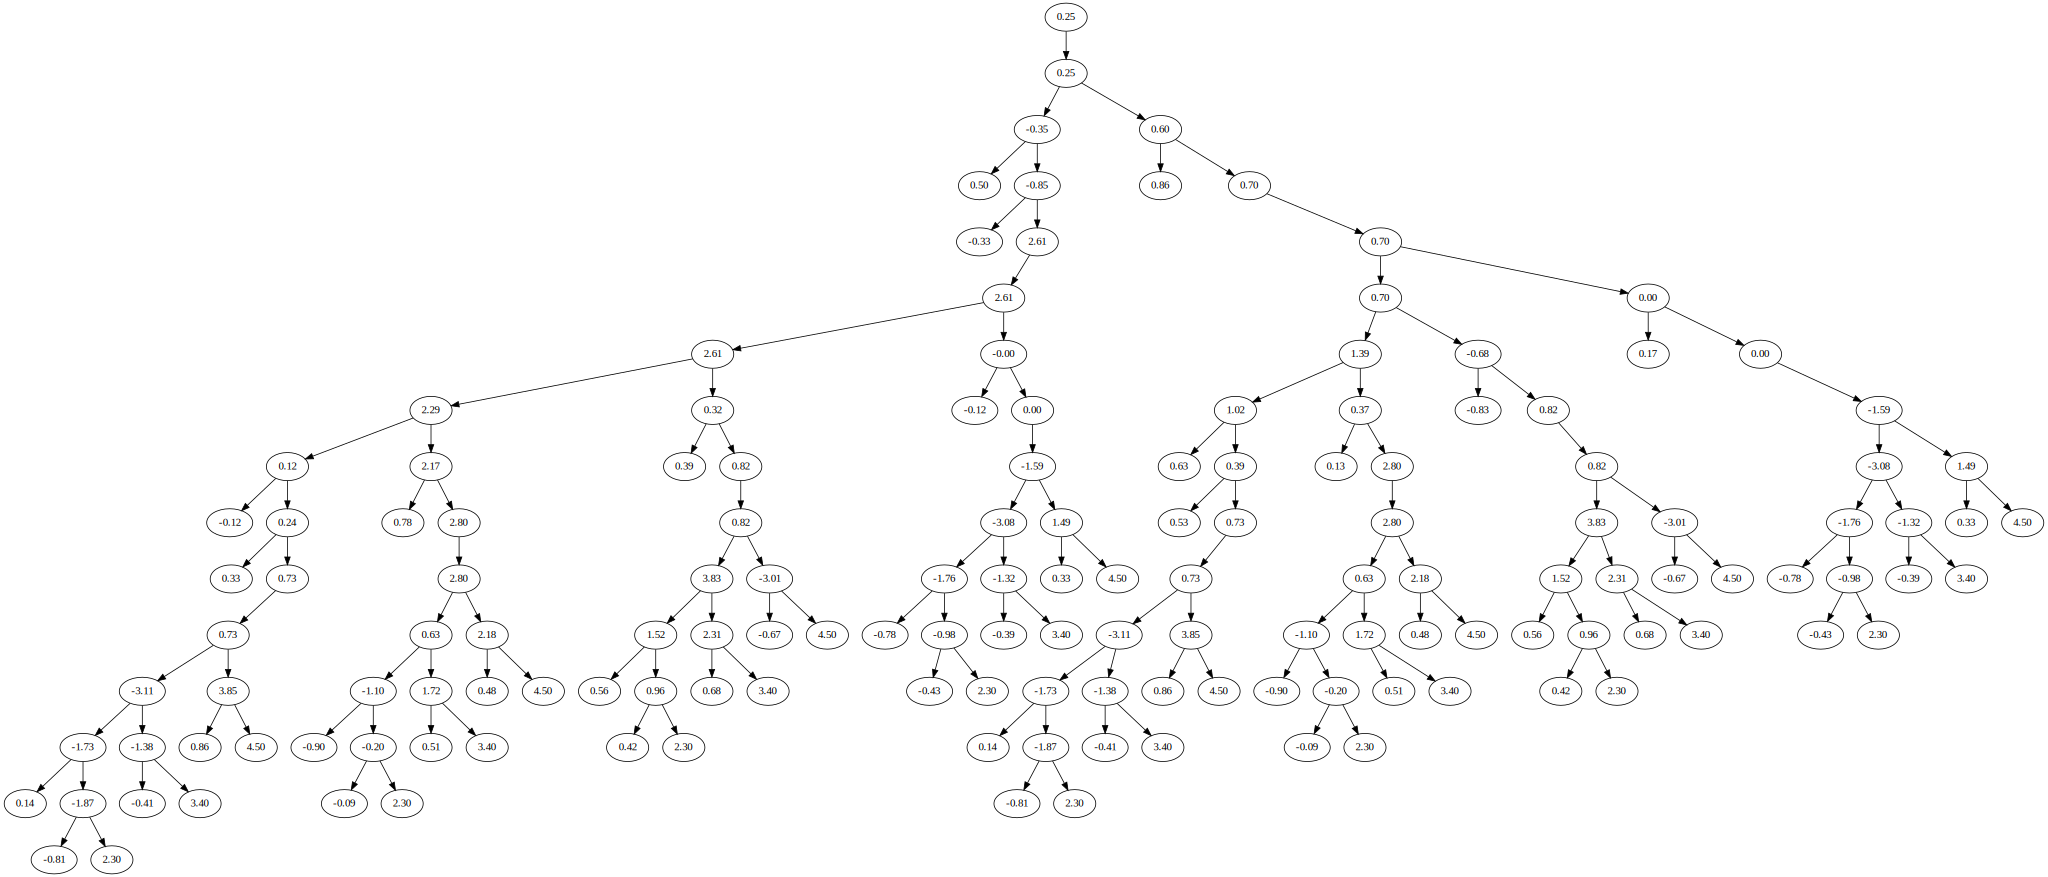

In [ ]:
plot_tensor_tree(n(x))

# Differentiation vs. Gradient

In [ ]:
def fn(x, y, z):
    return x**2 + 3*y + x*z

In [ ]:
fn(1,2,3)

10

In [ ]:
fn(2,3,4)

21

In [ ]:
h = 0.001

In [ ]:
(fn(2+h,3,4) - fn(2,3,4))/h

8.001000000000147

In [ ]:
(fn(2,3+h,4) - fn(2,3,4))/h

3.0000000000001137

In [ ]:
(fn(2,3,4+h) - fn(2,3,4))/h

2.0000000000024443